<div align="center">
    <span style="font-family: 'Lucida Calligraphy'; font-size: 70px; color:#560447;">TP1</span>
</div>
<br>

<div align="center">
    <span style="font-family: 'Lucida Calligraphy'; font-size: 30px; color: #F0F3F4;"> Implémentation de la logique floue avec FloLib</span>
</div>
<br><br>

<div align="left" style="font-family: 'Arial', sans-serif; color:#560447; font-size:18px;">
    <strong>Encadré par:</strong>
    <ul>
        <li style="color: white">Pr.Nidal LAMGHARI</li>
    </ul>
</div>

<div align="left" style="font-family: 'Arial', sans-serif; color:#560447; font-size: 18px;">
    <strong>Réalisé par :</strong>
    <ul>
        <li style="color: white">Bouzadi Chaima</li>
    </ul>
</div>

<div align="right" style="font-family: 'Arial', sans-serif; color: white; font-size: 16px;">
    <strong>Année :</strong> 2023/2024
</div>
<br><br><br>

<hr>
<br>


 

<div style="font-family: Arial, sans-serif; text-align: center; margin-bottom: 20px;">
    <h1 style="color: #560447; font-size: 36px; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
        1ère Partie : Introduction théorique et installation
    </h1>
</div>


<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Variable Floue : Température</h2>
    <p>
        Pour créer une variable floue <strong>Température</strong> avec les états linguistiques <strong>"Froid"</strong>, <strong>"Moyen"</strong> et <strong>"Chaud"</strong>, 
        nous utilisons la logique floue, qui permet de représenter les valeurs de température comme des ensembles flous. 
        Chaque état linguistique est associé à une <strong>fonction d'appartenance</strong>, définissant le degré d'appartenance d'une température à cet état. 
        Cela signifie qu'une température peut être partiellement <strong>"Moyen"</strong> et <strong>"Chaud"</strong> à la fois. 
        Nous modélisons ces états à l'aide de fonctions trapézoïdales, permettant une transition progressive entre les différents états.
    </p>
</div>


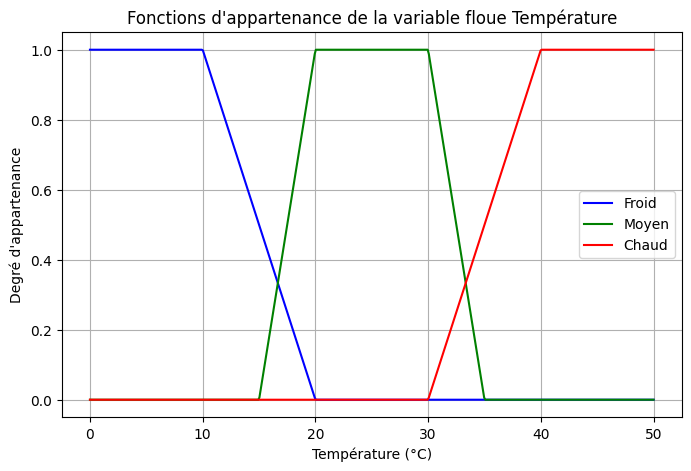

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Define the universe of discourse for Température
x_temperature = np.linspace(0, 50, 500)

# Define membership functions for Température
froid = fuzz.trapmf(x_temperature, [0, 0, 10, 20])
moyen = fuzz.trapmf(x_temperature, [15, 20, 30, 35])
chaud = fuzz.trapmf(x_temperature, [30, 40, 50, 50])

# Plot the membership functions
plt.figure(figsize=(8, 5))
plt.plot(x_temperature, froid, 'b', label='Froid')
plt.plot(x_temperature, moyen, 'g', label='Moyen')
plt.plot(x_temperature, chaud, 'r', label='Chaud')

# Labeling
plt.title("Fonctions d'appartenance de la variable floue Température")
plt.xlabel("Température (°C)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.grid()
plt.show()


<div style="font-family: Arial, sans-serif; text-align: center; margin-bottom: 20px;">
    <h1 style="color: #560447; font-size: 36px; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
       2ème Partie : Système flou pour le contrôle de température
    </h1>
</div>



<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Système Flou pour le Contrôle de la Puissance de Chauffage</h2>
    <p>
       
Dans cette section, nous créons un système flou destiné à ajuster la puissance d’un chauffage en fonction de la température ambiante. Nous définissons les variables d'entrée comme la température, qui peut être catégorisée en trois états linguistiques : <strong>Froid</strong>, <strong>Moyen</strong> et <strong>Chaud</strong>. En sortie, nous déterminons la puissance du chauffage, classée en <strong>Faible</strong>, <strong>Moyenne</strong> et<strong> Forte</strong>. Nous commençons par établir une nouvelle variable floue nommée<strong> Chauffage</strong> et ajoutons des fonctions d'appartenance pour chacune de ces catégories. Ensuite, nous mettons en place un ensemble de règles floues qui régulent la puissance de chauffage selon la température ambiante : si la température est <strong> Froide</strong>, la puissance est <strong> Forte</strong> ; si elle est <strong>Moyenne</strong>, la puissance est <strong> Moyenne</strong> ; et si elle est <strong>Chaude</strong>, la puissance est <strong>Faible</strong>. Enfin, nous simulons le système en entrant une température de <strong>25°C</strong> et calculons la puissance de chauffage correspondante, que nous affichons en pourcentage.
    </p>
</div>





Puissance du chauffage pour Température = 25°C : 50.00%


C:\Users\chaym\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


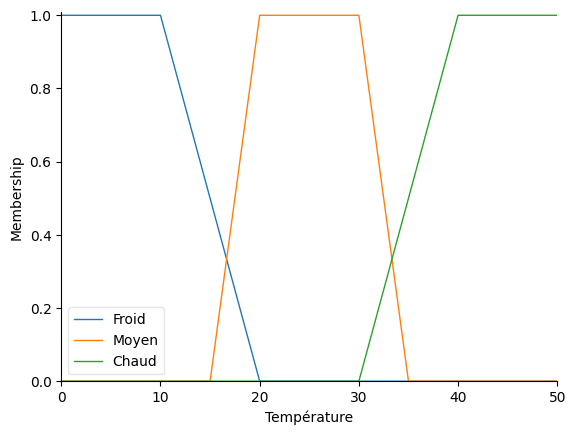

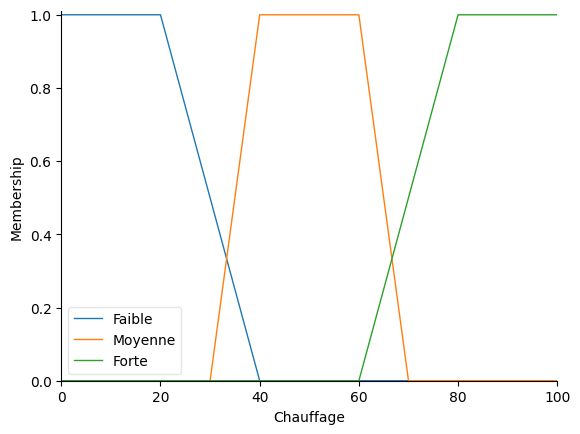

In [47]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Step 1: Define Fuzzy Variables for Input (Température) and Output (Chauffage)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'Température')
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'Chauffage')

# Step 2: Define Membership Functions for Température
temperature['Froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Step 3: Define Membership Functions for Chauffage
chauffage['Faible'] = fuzz.trapmf(chauffage.universe, [0, 0, 20, 40])
chauffage['Moyenne'] = fuzz.trapmf(chauffage.universe, [30, 40, 60, 70])
chauffage['Forte'] = fuzz.trapmf(chauffage.universe, [60, 80, 100, 100])

# Step 4: Define Fuzzy Rules
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])

# Step 5: Create the Control System and Add Rules
heating_control_system = ctrl.ControlSystem([rule1, rule2, rule3])
heating_simulation = ctrl.ControlSystemSimulation(heating_control_system)

# Step 6: Input Value and Compute Output
input_value = 25
heating_simulation.input['Température'] = input_value
heating_simulation.compute()
output_value = heating_simulation.output['Chauffage']

print(f"Puissance du chauffage pour Température = {input_value}°C : {output_value:.2f}%")

# Step 7: Plot Membership Functions for Visualization
temperature.view()
chauffage.view()
plt.show()


<div style="font-family: Arial, sans-serif; text-align: center; margin-bottom: 20px;">
    <h1 style="color: #560447; font-size: 36px; border-bottom: 2px solid #ccc; padding-bottom: 10px;">
       3ème Partie : Exploitation avancée de la bibliothèque FloLib
    </h1>
</div>



<div style="font-family: Arial, sans-serif; color: #333; font-size: 18px; background-color: #F9F9F9; padding: 20px; border-radius: 10px; border: 1px solid #ccc;">
    <h2 style="color: #560447;">Système de Gestion de la Vitesse d'un Véhicule Basé sur la Distance et la Visibilité</h2>
    <p>


Dans cette partie, nous avons conçu un système de gestion de la vitesse d'un véhicule en fonction de la distance à un obstacle et de la visibilité. Nous avons créé des variables d'entrée pour ces deux facteurs, ainsi qu'une variable de sortie pour la vitesse, et défini des fonctions d'appartenance pour chacune. Ensuite, nous avons établi des règles floues pour ajuster la vitesse selon les conditions de distance et de visibilité. Nous avons simulé différents scénarios, modifié les seuils des fonctions d'appartenance pour améliorer la sensibilité du système, et ajouté des règles de sécurité pour ralentir en cas de faible visibilité. Ces étapes nous ont permis de développer un système efficace pour contrôler la vitesse du véhicule selon les conditions ambiantes.
</p>
</div>


Pour une distance de 5 m et une visibilité de 10 %, vitesse recommandée : 7.78 km/h
Pour une distance de 25 m et une visibilité de 20 %, vitesse recommandée : 30.00 km/h
Pour une distance de 50 m et une visibilité de 50 %, vitesse recommandée : 50.00 km/h
Pour une distance de 80 m et une visibilité de 80 %, vitesse recommandée : 84.44 km/h
Pour une distance de 90 m et une visibilité de 5 %, vitesse recommandée : 7.78 km/h


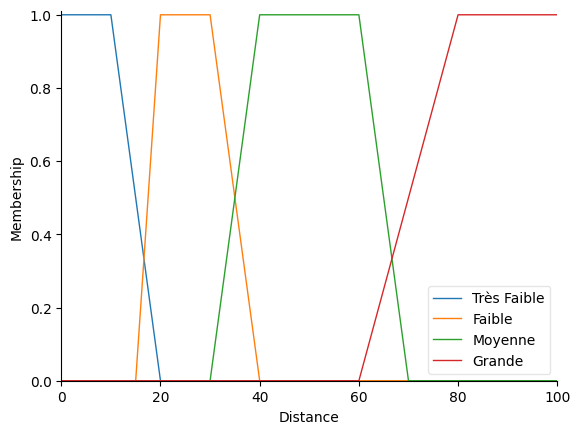

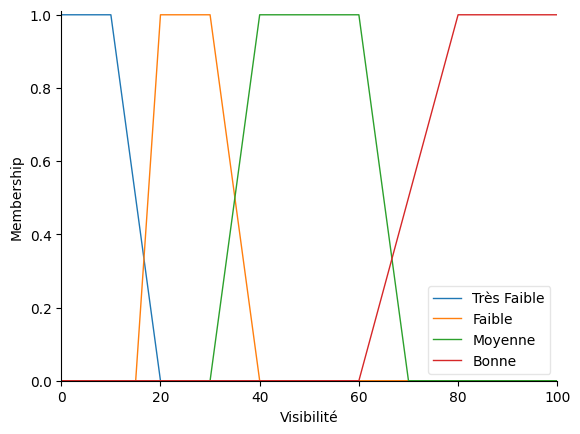

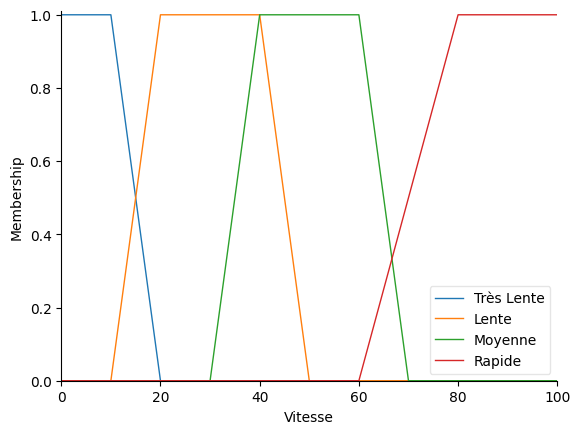

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Étape 1 : Créer les variables d'entrée et de sortie
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'Distance')  # Distance en mètres
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'Visibilité')  # Visibilité en pourcentage
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'Vitesse')  # Vitesse en km/h

# Étape 2 : Définir les fonctions d'appartenance pour chaque variable
# Pour la distance
distance['Très Faible'] = fuzz.trapmf(distance.universe, [0, 0, 10, 20])
distance['Faible'] = fuzz.trapmf(distance.universe, [15, 20, 30, 40])
distance['Moyenne'] = fuzz.trapmf(distance.universe, [30, 40, 60, 70])
distance['Grande'] = fuzz.trapmf(distance.universe, [60, 80, 100, 100])

# Pour la visibilité
visibilite['Très Faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 10, 20])
visibilite['Faible'] = fuzz.trapmf(visibilite.universe, [15, 20, 30, 40])
visibilite['Moyenne'] = fuzz.trapmf(visibilite.universe, [30, 40, 60, 70])
visibilite['Bonne'] = fuzz.trapmf(visibilite.universe, [60, 80, 100, 100])

# Pour la vitesse
vitesse['Très Lente'] = fuzz.trapmf(vitesse.universe, [0, 0, 10, 20])
vitesse['Lente'] = fuzz.trapmf(vitesse.universe, [10, 20, 40, 50])
vitesse['Moyenne'] = fuzz.trapmf(vitesse.universe, [30, 40, 60, 70])
vitesse['Rapide'] = fuzz.trapmf(vitesse.universe, [60, 80, 100, 100])

# Étape 3 : Établir des règles floues
rule1 = ctrl.Rule(distance['Très Faible'] & visibilite['Très Faible'], vitesse['Très Lente'])
rule2 = ctrl.Rule(distance['Faible'] & visibilite['Faible'], vitesse['Lente'])
rule3 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Moyenne'])
rule4 = ctrl.Rule(distance['Grande'] & visibilite['Bonne'], vitesse['Rapide'])

# Règle pour rendre la vitesse plus prudente
rule5 = ctrl.Rule(distance['Moyenne'] & visibilite['Très Faible'], vitesse['Lente'])

# Règle de sécurité
rule6 = ctrl.Rule(visibilite['Très Faible'], vitesse['Très Lente'])

# Créer le système de contrôle et ajouter les règles
speed_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
speed_simulation = ctrl.ControlSystemSimulation(speed_control_system)

# Étape 4 : Simuler plusieurs scénarios
def simulate_speed(distance_value, visibility_value):
    speed_simulation.input['Distance'] = distance_value
    speed_simulation.input['Visibilité'] = visibility_value
    speed_simulation.compute()
    return speed_simulation.output['Vitesse']

# Tester avec différentes combinaisons
test_cases = [(5, 10), (25, 20), (50, 50), (80, 80), (90, 5)]
for distance_value, visibility_value in test_cases:
    recommended_speed = simulate_speed(distance_value, visibility_value)
    print(f"Pour une distance de {distance_value} m et une visibilité de {visibility_value} %, vitesse recommandée : {recommended_speed:.2f} km/h")

# Étape 5 : Visualisation des fonctions d'appartenance
distance.view()
visibilite.view()
vitesse.view()
plt.show()
